In [1]:
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Sampling

#### univariate gaussian distribution
Xi ~ N(0,1)

Xi ~ mu + sigma*N(0,1)

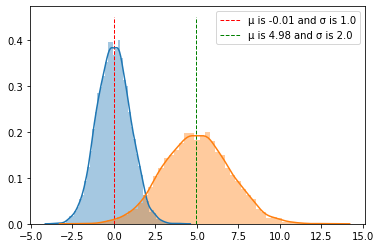

In [2]:
X0 = np.random.normal(loc=0, scale=1, size=10000)
μ_0, σ_0= stats.norm.fit(X0)
X1 = 5+2*X0
μ_1, σ_1= stats.norm.fit(X1)

sns.distplot(X0)
sns.distplot(X1)
s = "μ is {} and σ is {}".format(round(μ_0,2), round(σ_0, 2))
plt.vlines(μ_0, 0, 0.45, color="red", linestyles="--", lw=1, label=s)
s = "μ is {} and σ is {}".format(round(μ_1,2), round(σ_1, 2))
plt.vlines(μ_1, 0, 0.45, color="green", linestyles="--", lw=1, label=s)
plt.legend()
plt.show();

#### multivariate gaussian distribution

In [3]:
mean0 = np.zeros(2)
cov0 = np.identity(2)
XX0 = np.random.multivariate_normal(mean=mean0, cov=cov0, size=10000)
print(np.mean(XX0, axis=0))
print(np.cov(XX0, rowvar=0))

[ 0.0097117 -0.0144306]
[[ 0.98860887 -0.00534586]
 [-0.00534586  0.99371366]]


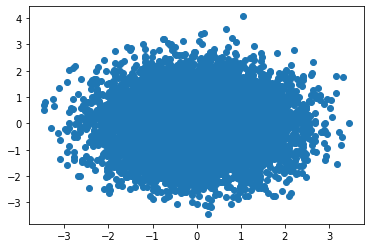

In [4]:
plt.scatter(XX0[:,0], XX0[:,1]);

sampling from multivariate gaussian distribution is 

XX ~ mu + transpose(cholesky(cov)) * N(zeros(), identity())

In [5]:
mean1 = np.array([3, 7])
cov1 = np.array([[1, 0.7],[0.7, 1]])
L1 = np.linalg.cholesky(cov1)
#np.dot(L1, np.linalg.inv(L1)) is a always identity matrix
#np.dot(L1, np.transpose(L1)) is alwayes a original matrix

In [6]:
XX1 = mean1 + np.dot(XX0,np.transpose(L1))
print(np.mean(XX1, axis=0))
print(np.cov(XX1, rowvar=0))

[3.0097117  6.99649268]
[[0.98860887 0.6882085 ]
 [0.6882085  0.98586752]]


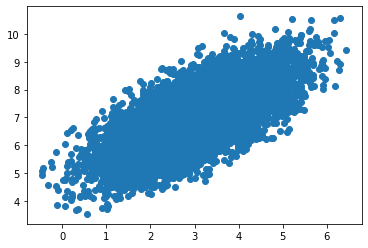

In [7]:
plt.scatter(XX1[:,0], XX1[:,1]);

In [8]:
XX1_org = np.random.multivariate_normal(mean=mean1, cov=cov1, size=10000)
print(np.mean(XX1_org, axis=0))
print(np.cov(XX1_org, rowvar=0))

[3.00017421 6.99813088]
[[1.01178603 0.70994034]
 [0.70994034 1.01500453]]


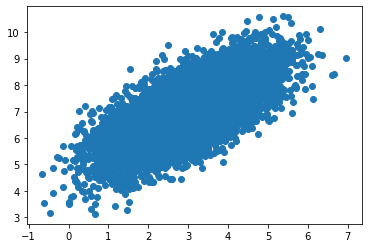

In [9]:
plt.scatter(XX1_org[:,0], XX1_org[:,1]);